In this notebook, I will compare the Stable Diffusion 1.4 model fine-tuned with LoRA against its original version. The aim here is not to improve the model’s performance, but to generate images in a specific style, impressionism in this case

In [2]:
import torch
from diffusers import StableDiffusionPipeline
from pathlib import Path
import matplotlib.pyplot as plt

In [6]:
cwd = Path.cwd()
checkpoint_dir = cwd / "model" / "checkpoint-15000"

In [7]:
pipe1 = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    torch_dtype=torch.float16,
)
pipe1.load_lora_weights(str(checkpoint_dir))
pipe1.to("cuda")

pipe2 = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    torch_dtype=torch.float16,
)
pipe2.to("cuda")

Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]
No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new
Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00,  9.49it/s]


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.34.0",
  "_name_or_path": "CompVis/stable-diffusion-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

100%|██████████| 69/69 [00:28<00:00,  2.41it/s]


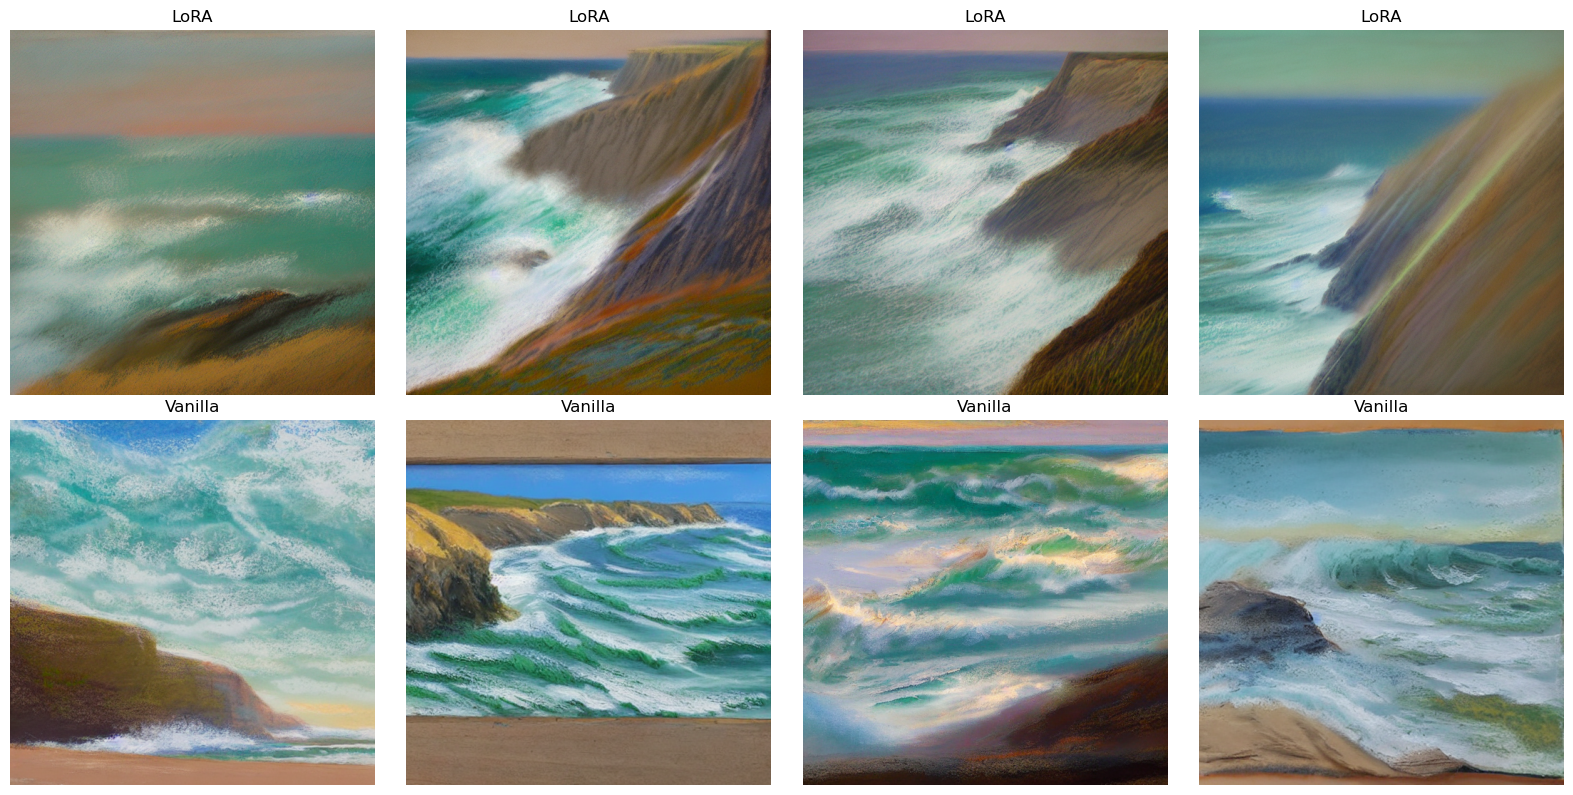

In [ ]:
prompt = "Sunlit coastal cliffs and crashing waves, dynamic brushstrokes, pastel seafoam greens and sandy ochres, atmospheric perspective"

images1 = pipe1([prompt]*4, num_inference_steps=70, guidance_scale=10).images
images2 = pipe2([prompt]*4, num_inference_steps=70, guidance_scale=10).images

all_images = images1 + images2
labels     = ["LoRA"]*4 + ["Vanilla"]*4

fig, axs = plt.subplots(2, 4, figsize=(16, 8))
for idx, ax in enumerate(axs.flatten()):
    ax.imshow(all_images[idx])
    ax.set_title(labels[idx], fontsize=12)
    ax.axis("off")

plt.tight_layout()
plt.show()

100%|██████████| 70/70 [00:29<00:00,  2.39it/s]


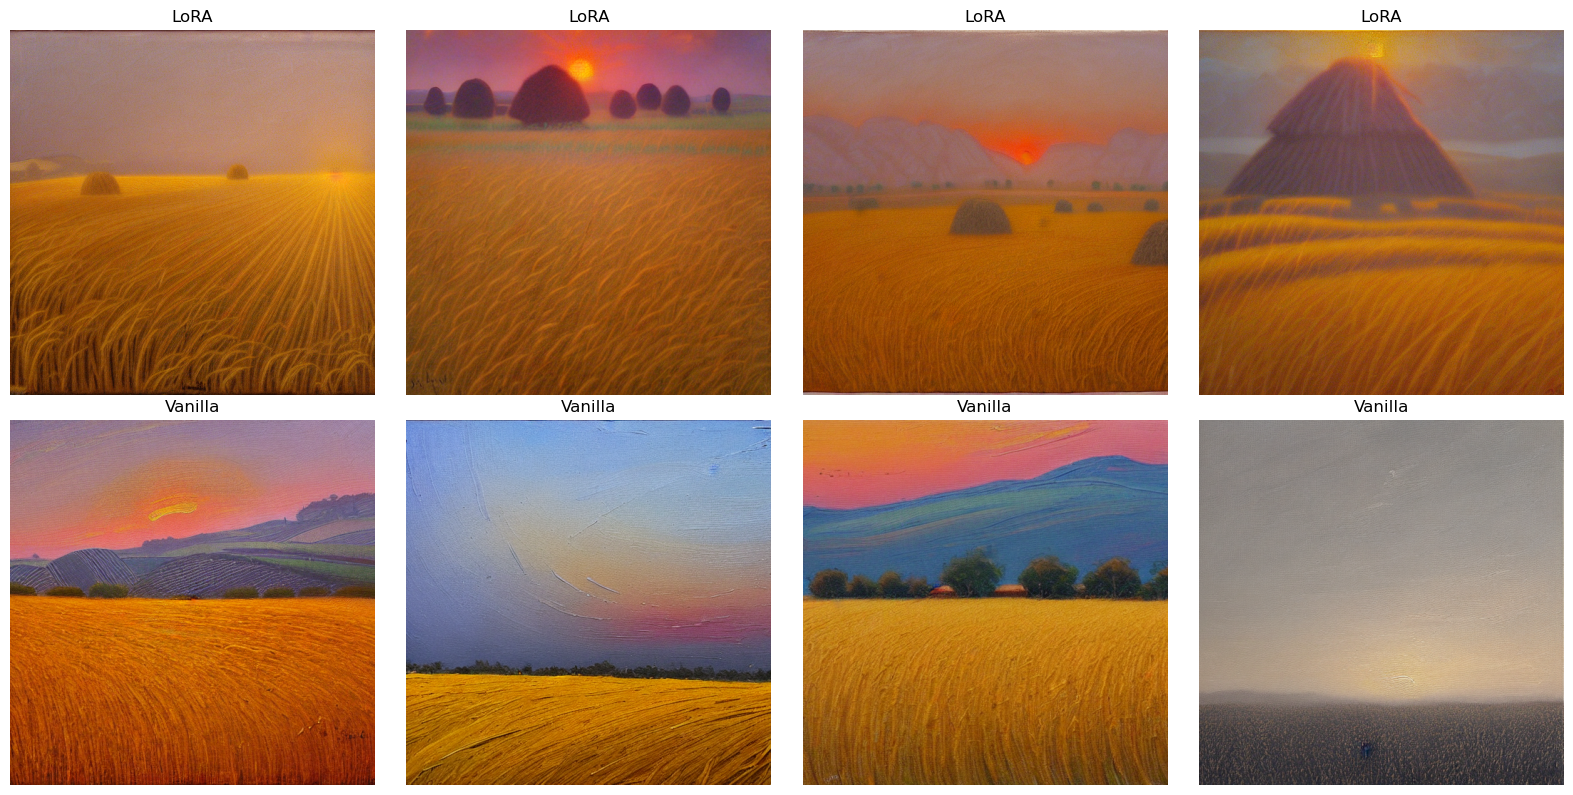

In [22]:
prompt = "A field of golden haystacks at sunrise, warm tonal harmonies, short broken brushstrokes, atmospheric haze, rural countryside,"

images1 = pipe1([prompt]*4, num_inference_steps=70, guidance_scale=10).images
images2 = pipe2([prompt]*4, num_inference_steps=70, guidance_scale=10).images

all_images = images1 + images2
labels     = ["LoRA"]*4 + ["Vanilla"]*4

fig, axs = plt.subplots(2, 4, figsize=(16, 8))
for idx, ax in enumerate(axs.flatten()):
    ax.imshow(all_images[idx])
    ax.set_title(labels[idx], fontsize=12)
    ax.axis("off")

plt.tight_layout()
plt.show()

100%|██████████| 70/70 [00:29<00:00,  2.39it/s]


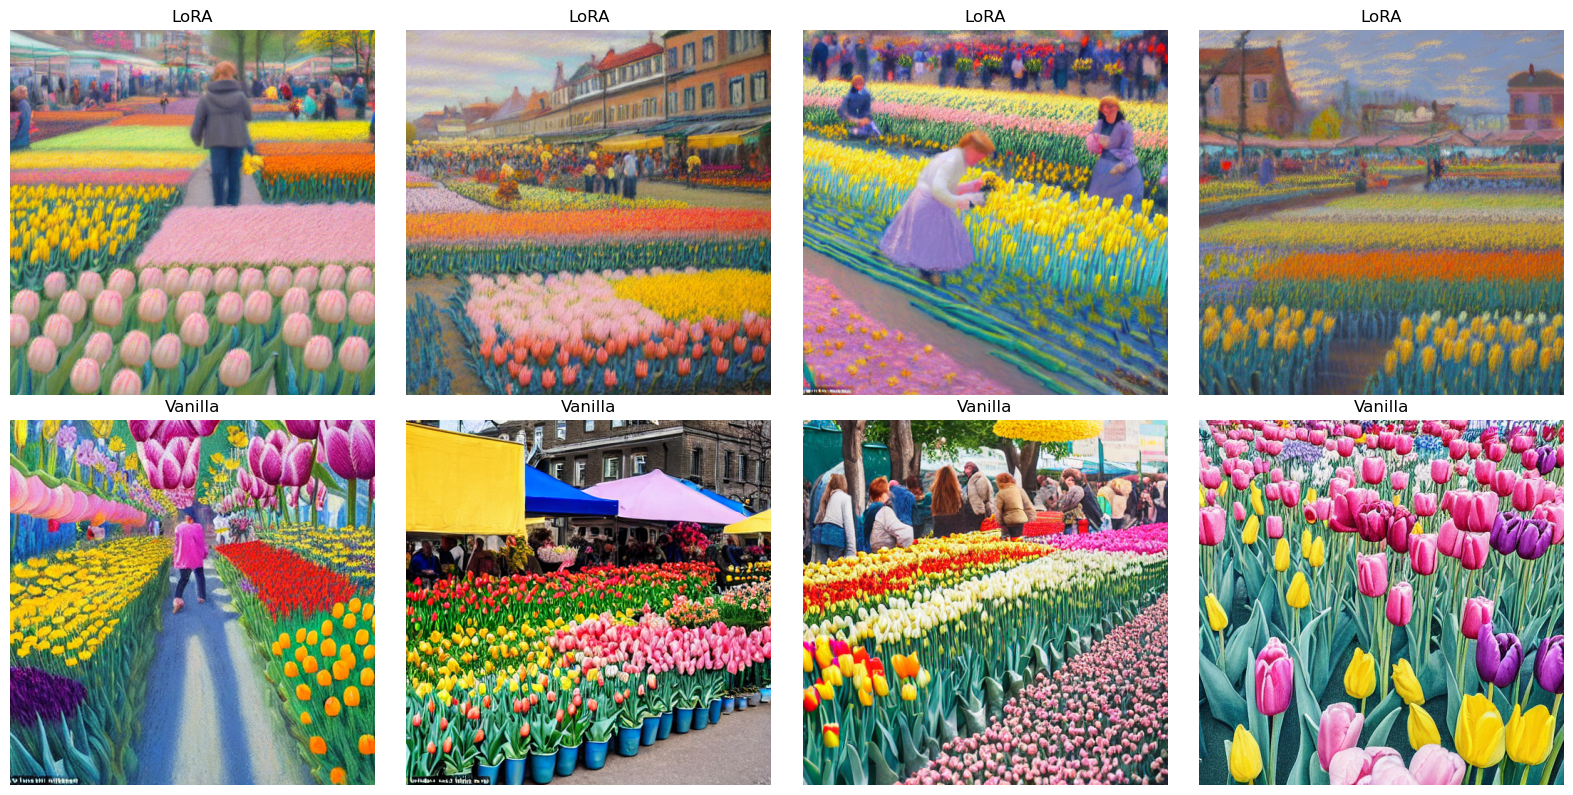

In [26]:
prompt = "An open-air flower market bursting with tulips and daffodils, sunlit stalls, lively brushwork, pastel palette"

images1 = pipe1([prompt]*4, num_inference_steps=70, guidance_scale=10).images
images2 = pipe2([prompt]*4, num_inference_steps=70, guidance_scale=10).images

all_images = images1 + images2
labels     = ["LoRA"]*4 + ["Vanilla"]*4

fig, axs = plt.subplots(2, 4, figsize=(16, 8))
for idx, ax in enumerate(axs.flatten()):
    ax.imshow(all_images[idx])
    ax.set_title(labels[idx], fontsize=12)
    ax.axis("off")

plt.tight_layout()
plt.show()